In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Project Outline

This project will include analysis to identify trends and give insights into factors which affect default rates on LendingClub loans. Data visualisations will be created to give LendingClub a clear visualisation of insights, as well as a predictive model to help identify who LendingClub should lend to in the future.

# Data Cleaning

### grades_info
Shows correlation between grade and sub-grade

In [2]:
#Reading in the data for grades
grade_info = pd.read_csv("../raw_data/grade_info.csv")

In [3]:
grade_info

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5
5,A,A4
6,E,E1
7,F,F2
8,C,C3
9,B,B1


Removing the last row with missing values and saving as a new dataframe "grades_clean"

In [4]:
grades_clean = grade_info.drop([35]).copy()

Writing grades_clean to csv and saving in clean_data files.

In [5]:
grades_clean.to_csv("../clean_data/grades_clean.csv")

### Reading in data dictionary for LendingClub Loans dataset.

In [6]:
data_dictionary = pd.read_csv("../raw_data/LCDataDictionary.csv")

Ensuring description column can be read in full.

In [7]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', 120)

data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


## States Dataset

In [8]:
#Reading in states dataset
states = pd.read_csv("../raw_data/state_names_info.csv")
states

,state_abb,state_name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DE,Delaware
8,FL,Florida
9,GA,Georgia


# LendingClub Loans Dataset

In [9]:
#Reading in the data for lending_club_loans
lending_club_loans = pd.read_csv("../raw_data/lending_club_loans.csv", low_memory = False)

In [10]:
lending_club_loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175.0,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863.0,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358.0,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176.0,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623.0,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686.0,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A3,Homemaker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
lending_club_loans.shape

(42538, 114)

42538 rows and 114 columns. There are quite a few columns which will be irrelevant in predicting loan defaults so these will be removed.  

In [12]:
#Taking a look at all variable names
lending_club_loans.iloc[0]

id                                                                                                  1.0775e+06
member_id                                                                                           1.2966e+06
loan_amnt                                                                                                 5000
funded_amnt                                                                                               5000
funded_amnt_inv                                                                                           4975
term                                                                                                 36 months
int_rate                                                                                                10.65%
installment                                                                                             162.87
sub_grade                                                                                                   B2
e

To begin with, I will remove the following columns:- zip_code, id, member_id, url, emp_title & description. Description is a free text field and does not add any value.

In [13]:
loans_clean = lending_club_loans.drop(["id", "member_id", "zip_code", "url", 
                                       "emp_title", "desc"], axis = 1).copy()
loans_clean

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B2,10+ years,RENT,24000.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C4,< 1 year,RENT,30000.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C5,10+ years,RENT,12252.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C1,10+ years,RENT,49200.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B5,1 year,RENT,80000.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,225.0,36 months,9.33%,80.69,B3,< 1 year,RENT,110000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,6500.0,6500.0,0.0,36 months,8.38%,204.84,A5,< 1 year,NONE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42535,5000.0,5000.0,0.0,36 months,7.75%,156.11,A3,10+ years,MORTGAGE,70000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
loans_clean.dtypes

loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
purpose                            object
title                              object
addr_state                         object
dti                               float64
delinq_2yrs                       float64
earliest_cr_line                   object
fico_range_low                    float64
fico_range_high                   float64
inq_last_6mths                    float64
mths_since_last_delinq            

## Missing Values

Now taking a look at columns with missing values

In [15]:
loans_clean.isna().sum()

loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
sub_grade                             3
emp_length                         1115
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
purpose                               3
title                                16
addr_state                            3
dti                                   3
delinq_2yrs                          32
earliest_cr_line                     32
fico_range_low                        3
fico_range_high                       3
inq_last_6mths                       32
mths_since_last_delinq            26929
mths_since_last_record            38887


There are numerous columns full of missing values which should be removed.

In [16]:
loans_clean = loans_clean.dropna(axis = "columns", how = "all")

There are also rows which are full of missing values which should also be removed.

In [17]:
loans_clean = loans_clean.dropna(how = "all")

In [18]:
loans_clean.iloc[0]

loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
sub_grade                              B2
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
fico_range_low                        735
fico_range_high                       739
inq_last_6mths                          1
mths_since_last_delinq            

Checking how many variables we are now left with.

In [19]:
loans_clean.shape

(42535, 54)

There are 54 variables left with still quite a few columns with missing values.
Now removing rows where there are more than 50% missing values in the dataset

In [20]:
half_data = len(loans_clean) / 2
loans_clean = loans_clean.dropna(thresh = half_data, axis = 1)

In [21]:
loans_clean.isna().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
sub_grade                        0
emp_length                    1112
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           13
addr_state                       0
dti                              0
delinq_2yrs                     29
earliest_cr_line                29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  29
open_acc                        29
pub_rec                         29
revol_bal                        0
revol_util                      90
total_acc                       29
initial_list_status 

Removing the rows with missing values for the following columns:

* annual_inc
* revol_util
* open_acc
* pub_rec_bankruptcies

In [22]:
loans_clean = loans_clean.dropna(how = "any", subset = ["annual_inc",
                                                       "open_acc",
                                                       "revol_util",
                                                       "pub_rec_bankruptcies"])
#There were a consistent number of missing values for these (29).

### Eliminating more variables

Variables "funded_amnt" and "funded_amnt_inv" give information on loans which have already been approved so should not be used in the predictive model, hence these are being removed. 

Next payment date and issued date will also be removed for the aforementioned reason once time series analysis has been carried out and before modelling.

mths_since_last_record, mths_since_last_delinq and next_pymnt_d also have thousands of missing values and are not relevant to predicting defaults so will be removed.

In [23]:
loans_clean = loans_clean.drop(["funded_amnt", "funded_amnt_inv", "pymnt_plan", "collections_12_mths_ex_med", 
                                "delinq_amnt", "last_fico_range_low", "last_fico_range_high",
                                "last_pymnt_d", "last_pymnt_amnt", "recoveries"], 
                               axis = 1)
loans_clean

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,B2,10+ years,RENT,24000.0,Verified,Dec-2011,...,863.16,0.00,0.00,Sep-2016,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,...,435.17,0.00,1.11,Sep-2016,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,...,605.67,0.00,0.00,Sep-2016,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,...,2214.92,16.97,0.00,Apr-2016,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,...,1055.27,0.00,0.00,Sep-2016,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42371,20425.0,36 months,15.96%,298.67,F4,4 years,RENT,29000.0,Not Verified,Oct-2007,...,1013.67,0.00,0.00,Sep-2016,1.0,INDIVIDUAL,0.0,0.0,1.0,0.0
42386,4400.0,36 months,17.86%,158.77,G5,9 years,MORTGAGE,125000.0,Not Verified,Oct-2007,...,1315.38,0.00,0.00,Apr-2016,1.0,INDIVIDUAL,0.0,0.0,1.0,0.0
42454,5700.0,36 months,13.43%,193.26,E1,5 years,RENT,65000.0,Not Verified,Aug-2007,...,1257.00,0.00,0.00,Sep-2016,1.0,INDIVIDUAL,0.0,NaN,1.0,0.0
42466,6000.0,36 months,12.80%,201.60,D4,8 years,RENT,57000.0,Not Verified,Aug-2007,...,1262.22,60.00,0.00,May-2011,1.0,INDIVIDUAL,0.0,NaN,1.0,0.0


### Policy Code

In [24]:
loans_clean["policy_code"].value_counts()

1.0    41112
Name: policy_code, dtype: int64

Policy code has only one value so will not add much value to analysis or the predictive model.

In [25]:
loans_clean = loans_clean.drop(["policy_code"], axis = 1)

In [26]:
loans_clean.shape

(41112, 40)

### Tax Liens

In [27]:
loans_clean["tax_liens"].value_counts()

0.0    41112
Name: tax_liens, dtype: int64

Tax Liens also has only one value so will not add much value to analysis or the predictive model.

In [28]:
loans_clean = loans_clean.drop(["tax_liens"], axis = 1)

### Bulk removal of further variables which are irrelevant in default prediction

In [29]:
loans_clean = loans_clean.drop(["title", "revol_bal", "initial_list_status", 
                                "out_prncp", "out_prncp_inv", "total_pymnt",
                                "total_pymnt_inv", "total_rec_prncp", "total_rec_int",
                                "total_rec_late_fee", "chargeoff_within_12_mths", "total_acc",
                               "last_credit_pull_d", "collection_recovery_fee"],
                               axis = 1)

In [30]:
loans_clean.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_length              1109
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                 0
application_type           0
acc_now_delinq             0
pub_rec_bankruptcies       0
dtype: int64

In [31]:
#Employment length has over 1000 missing values.
#Obtaining a list of values for this variable
loans_clean['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

### Employment Length

In [32]:
#Removing missing values in emp_length.  
loans_clean.loc[:, "emp_length"] = loans_clean.dropna(how = "any", subset = ["emp_length"])

Binning values in emp_length. 

In [33]:
def emp_num (row):
    if row['emp_length'] in ["< 1 year", "1 year"]:
        return '< 2 years'
    if row['emp_length'] in ["2 years", "3 years", "4 years"]:
        return '2 - 4 years'
    if row['emp_length'] in ["5 years", "6 years", "7 years", "8 years", "9 years"]:
        return '5 - 9 years'
    return '10+ years'

loans_clean['emp_length'] = loans_clean.apply(lambda row: emp_num(row), axis=1)

In [34]:
#Verifying the employment length column has been changed
loans_clean['emp_length'].value_counts()

2 - 4 years    12368
5 - 9 years    10392
10+ years      10278
< 2 years       8074
Name: emp_length, dtype: int64

In [35]:
loans_clean.dtypes

loan_amnt               float64
term                     object
int_rate                 object
installment             float64
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs             float64
earliest_cr_line         object
fico_range_low          float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_util               object
application_type         object
acc_now_delinq          float64
pub_rec_bankruptcies    float64
dtype: object

# Joining all three datsets together

Firstly, joining loans dataset with states dataset to show state abbreviations as names.

In [36]:
loans_data_clean = pd.merge(loans_clean, states, left_on="addr_state", right_on="state_abb")
#removing the columns "add_state" and "state_abb" as these are now replaced with "state_name"
loans_data_clean = loans_data_clean.drop(["addr_state", "state_abb"], axis = 1)
loans_data_clean

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,application_type,acc_now_delinq,pub_rec_bankruptcies,state_name
0,5000.0,36 months,10.65%,162.87,B2,10+ years,RENT,24000.0,Verified,Dec-2011,...,735.0,739.0,1.0,3.0,0.0,83.7%,INDIVIDUAL,0.0,0.0,Arizona
1,5000.0,36 months,7.90%,156.46,A4,2 - 4 years,RENT,36000.0,Source Verified,Dec-2011,...,730.0,734.0,3.0,9.0,0.0,28.3%,INDIVIDUAL,0.0,0.0,Arizona
2,6500.0,60 months,14.65%,153.45,C3,5 - 9 years,OWN,72000.0,Not Verified,Dec-2011,...,695.0,699.0,2.0,14.0,0.0,20.6%,INDIVIDUAL,0.0,0.0,Arizona
3,6000.0,36 months,12.42%,200.50,B4,< 2 years,RENT,36852.0,Source Verified,Dec-2011,...,695.0,699.0,1.0,7.0,0.0,66.5%,INDIVIDUAL,0.0,0.0,Arizona
4,12000.0,36 months,16.29%,423.61,D1,5 - 9 years,RENT,88365.0,Verified,Dec-2011,...,680.0,684.0,0.0,6.0,0.0,96.4%,INDIVIDUAL,0.0,0.0,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40889,25000.0,36 months,10.08%,807.62,B3,< 2 years,MORTGAGE,145000.0,Not Verified,Apr-2008,...,760.0,764.0,1.0,9.0,0.0,14.1%,INDIVIDUAL,0.0,0.0,Idaho
40890,6000.0,36 months,12.92%,201.94,D2,< 2 years,MORTGAGE,40800.0,Not Verified,Mar-2008,...,665.0,669.0,2.0,11.0,0.0,47.3%,INDIVIDUAL,0.0,0.0,Idaho
40891,6150.0,36 months,11.03%,201.44,C1,< 2 years,RENT,35713.6,Not Verified,Mar-2008,...,685.0,689.0,0.0,4.0,0.0,64.3%,INDIVIDUAL,0.0,0.0,Idaho
40892,7100.0,36 months,12.29%,236.81,C5,5 - 9 years,MORTGAGE,25000.0,Not Verified,Apr-2008,...,670.0,674.0,1.0,6.0,0.0,63.9%,INDIVIDUAL,0.0,0.0,Idaho


Now joining loans_data with grades dataset.

In [37]:
loans_data_clean = pd.merge(loans_data_clean, grades_clean, how = "left")
loans_data_clean

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,application_type,acc_now_delinq,pub_rec_bankruptcies,state_name,grade
0,5000.0,36 months,10.65%,162.87,B2,10+ years,RENT,24000.0,Verified,Dec-2011,...,739.0,1.0,3.0,0.0,83.7%,INDIVIDUAL,0.0,0.0,Arizona,B
1,5000.0,36 months,7.90%,156.46,A4,2 - 4 years,RENT,36000.0,Source Verified,Dec-2011,...,734.0,3.0,9.0,0.0,28.3%,INDIVIDUAL,0.0,0.0,Arizona,A
2,6500.0,60 months,14.65%,153.45,C3,5 - 9 years,OWN,72000.0,Not Verified,Dec-2011,...,699.0,2.0,14.0,0.0,20.6%,INDIVIDUAL,0.0,0.0,Arizona,C
3,6000.0,36 months,12.42%,200.50,B4,< 2 years,RENT,36852.0,Source Verified,Dec-2011,...,699.0,1.0,7.0,0.0,66.5%,INDIVIDUAL,0.0,0.0,Arizona,B
4,12000.0,36 months,16.29%,423.61,D1,5 - 9 years,RENT,88365.0,Verified,Dec-2011,...,684.0,0.0,6.0,0.0,96.4%,INDIVIDUAL,0.0,0.0,Arizona,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40889,25000.0,36 months,10.08%,807.62,B3,< 2 years,MORTGAGE,145000.0,Not Verified,Apr-2008,...,764.0,1.0,9.0,0.0,14.1%,INDIVIDUAL,0.0,0.0,Idaho,B
40890,6000.0,36 months,12.92%,201.94,D2,< 2 years,MORTGAGE,40800.0,Not Verified,Mar-2008,...,669.0,2.0,11.0,0.0,47.3%,INDIVIDUAL,0.0,0.0,Idaho,D
40891,6150.0,36 months,11.03%,201.44,C1,< 2 years,RENT,35713.6,Not Verified,Mar-2008,...,689.0,0.0,4.0,0.0,64.3%,INDIVIDUAL,0.0,0.0,Idaho,C
40892,7100.0,36 months,12.29%,236.81,C5,5 - 9 years,MORTGAGE,25000.0,Not Verified,Apr-2008,...,674.0,1.0,6.0,0.0,63.9%,INDIVIDUAL,0.0,0.0,Idaho,C


Removing the column "sub_grade" as this has now replaced with "grade"

In [38]:
loans_data_clean = loans_data_clean.drop(["sub_grade"], axis = 1)

# Target Variable - "loan_status"

Taking a closer look at the "loan_status" variable which will be the target variable used to predict defaults.

In [39]:
loans_data_clean['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'In Grace Period', 'Late (31-120 days)', 'Default'], dtype=object)

There are a list of 9 options under "loan_status", however whether a loan has been fully paid or charged off are the important values.

Taking a look at how many rows there are for each of the 9 options.

In [40]:
loans_data_clean['loan_status'].value_counts()

Fully Paid                                             32779
Charged Off                                             5505
Does not meet the credit policy. Status:Fully Paid      1522
Does not meet the credit policy. Status:Charged Off      542
Current                                                  512
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

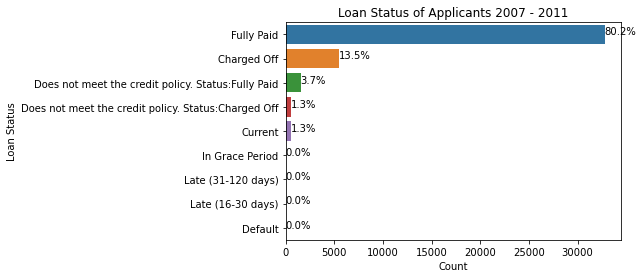

In [41]:
ax = sns.countplot(y = "loan_status", data = loans_data_clean, 
                   order = loans_data_clean["loan_status"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.title("Loan Status of Applicants 2007 - 2011")

total = len(loans_data_clean['loan_status'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Keeping only the two options relevant in "loan_status".

In [42]:
loans_data_clean = loans_data_clean[(loans_data_clean['loan_status'] == "Fully Paid")
                                    | (loans_data_clean['loan_status'] == "Charged Off")]

In [43]:
loans_data_clean['loan_status'].value_counts()

Fully Paid     32779
Charged Off     5505
Name: loan_status, dtype: int64

## Other Possible Variables in Feature Selection

### Home Ownership

In [44]:
loans_data_clean["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

### Verification Status

In [45]:
loans_data_clean["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

### Purpose of Application

In [46]:
loans_data_clean["purpose"].unique()

array(['credit_card', 'wedding', 'debt_consolidation', 'other',
       'home_improvement', 'small_business', 'major_purchase', 'moving',
       'car', 'house', 'vacation', 'medical', 'renewable_energy',
       'educational'], dtype=object)

### Application Type

In [47]:
loans_data_clean["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [48]:
lending_club_loans["application_type"].unique()

array(['INDIVIDUAL', nan], dtype=object)

After comparing the "application_type" variable in the raw data and clean data, the application type is only either "individual" or "nan". It would appear that this column doesn't add much value so I will lose it.

In [49]:
loans_data_clean = loans_data_clean.drop(["application_type"], axis = 1)

### Issue Date

In [50]:
loans_data_clean['issue_d'].describe()

count        38284
unique          52
top       Nov-2011
freq          2076
Name: issue_d, dtype: object

Converting issue_d to year, losing month. This will be used for analysis but will not be used in predictive model.

In [51]:
loans_data_clean['issue_d'] = pd.to_datetime(loans_data_clean['issue_d'])
loans_data_clean.loc[:, 'issue_d'] = (loans_data_clean['issue_d'].dt.year)

In [52]:
loans_data_clean["issue_d"].unique()

array([2011, 2010, 2009, 2008, 2007])

### Accounts Delinquent

In [53]:
loans_data_clean["acc_now_delinq"].unique()

array([0.])

The variable "acc_now_delinq" is full of 0 values so won't add any value in analysing the data so will also be removed.

In [54]:
loans_data_clean = loans_data_clean.drop(["acc_now_delinq"], axis = 1)
loans_data_clean

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,state_name,grade
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,2011,Fully Paid,...,Jan-1985,735.0,739.0,1.0,3.0,0.0,83.7%,0.0,Arizona,B
1,5000.0,36 months,7.90%,156.46,2 - 4 years,RENT,36000.0,Source Verified,2011,Fully Paid,...,Nov-2004,730.0,734.0,3.0,9.0,0.0,28.3%,0.0,Arizona,A
2,6500.0,60 months,14.65%,153.45,5 - 9 years,OWN,72000.0,Not Verified,2011,Fully Paid,...,Jan-1998,695.0,699.0,2.0,14.0,0.0,20.6%,0.0,Arizona,C
3,6000.0,36 months,12.42%,200.50,< 2 years,RENT,36852.0,Source Verified,2011,Fully Paid,...,Apr-2007,695.0,699.0,1.0,7.0,0.0,66.5%,0.0,Arizona,B
4,12000.0,36 months,16.29%,423.61,5 - 9 years,RENT,88365.0,Verified,2011,Fully Paid,...,Oct-1996,680.0,684.0,0.0,6.0,0.0,96.4%,0.0,Arizona,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40888,9600.0,36 months,10.08%,310.13,2 - 4 years,MORTGAGE,60000.0,Not Verified,2008,Fully Paid,...,May-1994,730.0,734.0,0.0,8.0,0.0,30.9%,0.0,Idaho,B
40889,25000.0,36 months,10.08%,807.62,< 2 years,MORTGAGE,145000.0,Not Verified,2008,Fully Paid,...,Dec-1986,760.0,764.0,1.0,9.0,0.0,14.1%,0.0,Idaho,B
40890,6000.0,36 months,12.92%,201.94,< 2 years,MORTGAGE,40800.0,Not Verified,2008,Fully Paid,...,Oct-2000,665.0,669.0,2.0,11.0,0.0,47.3%,0.0,Idaho,D
40891,6150.0,36 months,11.03%,201.44,< 2 years,RENT,35713.6,Not Verified,2008,Fully Paid,...,Oct-2004,685.0,689.0,0.0,4.0,0.0,64.3%,0.0,Idaho,C


### Interest Rate and Revolving Credit Utilisation columns

Removing "%" from interest rate and revol_util columns

In [55]:
loans_data_clean['int_rate'] = loans_data_clean['int_rate'].str.replace('%', '')
loans_data_clean['revol_util'] = loans_data_clean['revol_util'].str.replace('%', '')

### Loan Term

In [56]:
loans_data_clean["term"].unique()

array(['36 months', '60 months'], dtype=object)

### Fico Range

In [57]:
loans_data_clean["fico_range_high"].unique()

array([739., 734., 699., 684., 694., 679., 674., 689., 719., 794., 729.,
       709., 714., 669., 749., 759., 774., 744., 754., 704., 724., 784.,
       664., 764., 769., 779., 799., 789., 804., 809., 814., 819., 824.,
       829.])

In [58]:
loans_data_clean["fico_range_low"].unique()

array([735., 730., 695., 680., 690., 675., 670., 685., 715., 790., 725.,
       705., 710., 665., 745., 755., 770., 740., 750., 700., 720., 780.,
       660., 760., 765., 775., 795., 785., 800., 805., 810., 815., 820.,
       825.])

The variable "fico_range_low" is 4 points off the "fico_range_high" score. Will take the average of the two scores and hold in a new column.

In [59]:
loans_data_clean["fico_range"] = (loans_data_clean["fico_range_low"] + loans_data_clean["fico_range_high"])/2

In [60]:
loans_data_clean = loans_data_clean.drop(["fico_range_low", "fico_range_high"], axis = 1)
loans_data_clean

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,state_name,grade,fico_range
0,5000.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,2011,Fully Paid,...,0.0,Jan-1985,1.0,3.0,0.0,83.7,0.0,Arizona,B,737.0
1,5000.0,36 months,7.90,156.46,2 - 4 years,RENT,36000.0,Source Verified,2011,Fully Paid,...,0.0,Nov-2004,3.0,9.0,0.0,28.3,0.0,Arizona,A,732.0
2,6500.0,60 months,14.65,153.45,5 - 9 years,OWN,72000.0,Not Verified,2011,Fully Paid,...,0.0,Jan-1998,2.0,14.0,0.0,20.6,0.0,Arizona,C,697.0
3,6000.0,36 months,12.42,200.50,< 2 years,RENT,36852.0,Source Verified,2011,Fully Paid,...,0.0,Apr-2007,1.0,7.0,0.0,66.5,0.0,Arizona,B,697.0
4,12000.0,36 months,16.29,423.61,5 - 9 years,RENT,88365.0,Verified,2011,Fully Paid,...,0.0,Oct-1996,0.0,6.0,0.0,96.4,0.0,Arizona,D,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40888,9600.0,36 months,10.08,310.13,2 - 4 years,MORTGAGE,60000.0,Not Verified,2008,Fully Paid,...,0.0,May-1994,0.0,8.0,0.0,30.9,0.0,Idaho,B,732.0
40889,25000.0,36 months,10.08,807.62,< 2 years,MORTGAGE,145000.0,Not Verified,2008,Fully Paid,...,0.0,Dec-1986,1.0,9.0,0.0,14.1,0.0,Idaho,B,762.0
40890,6000.0,36 months,12.92,201.94,< 2 years,MORTGAGE,40800.0,Not Verified,2008,Fully Paid,...,2.0,Oct-2000,2.0,11.0,0.0,47.3,0.0,Idaho,D,667.0
40891,6150.0,36 months,11.03,201.44,< 2 years,RENT,35713.6,Not Verified,2008,Fully Paid,...,0.0,Oct-2004,0.0,4.0,0.0,64.3,0.0,Idaho,C,687.0


Changing the "fico_range" values to categorical.

In [61]:
bins = [0, 580, 670, 740, 800, np.inf]
names = ["Poor", "Fair", "Good", "Very Good", "Exceptional"]

loans_data_clean['credit_score'] = pd.cut(loans_data_clean['fico_range'], bins, labels=names)
loans_data_clean.head(50)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,state_name,grade,fico_range,credit_score
0,5000.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,2011,Fully Paid,...,Jan-1985,1.0,3.0,0.0,83.7,0.0,Arizona,B,737.0,Good
1,5000.0,36 months,7.90,156.46,2 - 4 years,RENT,36000.0,Source Verified,2011,Fully Paid,...,Nov-2004,3.0,9.0,0.0,28.3,0.0,Arizona,A,732.0,Good
2,6500.0,60 months,14.65,153.45,5 - 9 years,OWN,72000.0,Not Verified,2011,Fully Paid,...,Jan-1998,2.0,14.0,0.0,20.6,0.0,Arizona,C,697.0,Good
3,6000.0,36 months,12.42,200.50,< 2 years,RENT,36852.0,Source Verified,2011,Fully Paid,...,Apr-2007,1.0,7.0,0.0,66.5,0.0,Arizona,B,697.0,Good
4,12000.0,36 months,16.29,423.61,5 - 9 years,RENT,88365.0,Verified,2011,Fully Paid,...,Oct-1996,0.0,6.0,0.0,96.4,0.0,Arizona,D,682.0,Good
5,6000.0,36 months,13.49,203.59,5 - 9 years,RENT,50000.0,Not Verified,2011,Fully Paid,...,Mar-2004,1.0,6.0,0.0,91.5,0.0,Arizona,C,692.0,Good
6,5600.0,36 months,14.65,193.17,< 2 years,MORTGAGE,85000.0,Not Verified,2011,Charged Off,...,May-1999,3.0,8.0,0.0,90.8,0.0,Arizona,C,677.0,Good
7,7400.0,36 months,13.49,251.09,< 2 years,OWN,25000.0,Source Verified,2011,Fully Paid,...,Mar-1990,0.0,5.0,0.0,92.8,0.0,Arizona,C,692.0,Good
8,24250.0,60 months,23.91,519.76,5 - 9 years,MORTGAGE,120000.0,Verified,2011,Fully Paid,...,Apr-2000,3.0,7.0,0.0,99,0.0,Arizona,G,672.0,Good
9,2500.0,36 months,11.71,82.69,5 - 9 years,MORTGAGE,29000.0,Verified,2011,Fully Paid,...,Sep-2005,0.0,5.0,0.0,66.7,0.0,Arizona,B,687.0,Good


### Public Record Bankruptcies

In [62]:
loans_data_clean["pub_rec_bankruptcies"].value_counts()

0.0    36617
1.0     1662
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Sounds similar to pub_rec so will check if they are correlated.

In [63]:
loans_data_clean[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.845011
pub_rec_bankruptcies,0.845011,1.000000


### Derogatory Public Records

In [64]:
loans_data_clean["pub_rec"].value_counts()

0.0    36206
1.0     2020
2.0       48
3.0        8
4.0        2
Name: pub_rec, dtype: int64

Binning the values

In [65]:
def pub_rec_bin (row):
    if row["pub_rec"] == 0.00:
        return "0"
    return "1+"

loans_data_clean['pub_rec'] = loans_data_clean.apply(lambda row: pub_rec_bin(row), axis=1)
loans_data_clean["pub_rec"].value_counts()

0     36206
1+     2078
Name: pub_rec, dtype: int64

In [66]:
#Dropping pub_rec_pankruptcies
loans_data_clean = loans_data_clean.drop(["pub_rec_bankruptcies"], axis = 1)

### Delinquency

Checking "delinq_2yrs" - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [67]:
loans_data_clean["delinq_2yrs"].value_counts()

0.0     34135
1.0      3185
2.0       658
3.0       210
4.0        57
5.0        21
6.0        10
7.0         4
8.0         2
11.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

Binning variable to condense output.

In [68]:
def delinq_cat (row):
    if row["delinq_2yrs"] == 0.00:
        return "0"
    if row["delinq_2yrs"] == 1.0:
        return "1"
    return "2+"

loans_data_clean["delinq_2yrs"] = loans_data_clean.apply(lambda row: delinq_cat(row), axis = 1)
loans_data_clean["delinq_2yrs"].value_counts()

0     34135
1      3185
2+      964
Name: delinq_2yrs, dtype: int64

### Earliest Credit Line

In [69]:
loans_data_clean['earliest_cr_line'].value_counts()

Nov-1998    358
Oct-1999    354
Oct-2000    338
Dec-1998    337
Dec-1997    319
           ... 
Sep-1963      1
Dec-1965      1
Jul-1964      1
Nov-1961      1
Oct-1969      1
Name: earliest_cr_line, Length: 526, dtype: int64

Converting earliest_cr_line to the amount of time that has passed since the first credit line was opened for an applicant.

In [70]:
loans_data_clean.earliest_cr_line = pd.to_datetime(loans_data_clean.earliest_cr_line)

dttoday = datetime.now().strftime('%Y-%m-%d')
loans_data_clean.earliest_cr_line = loans_data_clean.earliest_cr_line.apply(
    lambda x:(np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)

Writing cleaned data to csv.

In [71]:
loans_data_clean.to_csv("../clean_data/loans_data.csv", index=False)